In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# get input data
df = pd.read_csv('/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results/ratings.csv')
df

,user,objects,rate,_,time
0,19,Soldier_r3_d500,7,0,2023-03-20-09:29:29+01:00
1,19,Soldier_r3_d250,5,0,2023-03-20-09:29:47+01:00
2,19,RedAndBlack_r3_d125,5,0,2023-03-20-09:30:01+01:00
3,19,Soldier_r5_d250,7,0,2023-03-20-09:30:16+01:00
4,19,Soldier_r5_d500,8,0,2023-03-20-09:30:30+01:00
...,...,...,...,...,...
1183,56,Loot_r3_r3_d500,6,0,2023-03-31-15:47:04+02:00
1184,56,LongDress_r1_r5_d500,5,0,2023-03-31-15:47:17+02:00
1185,56,Loot_r1_r5_d500,4,0,2023-03-31-15:47:34+02:00
1186,56,Loot_r3_r1_d500,4,0,2023-03-31-15:47:45+02:00


In [3]:
objects_rates = {}
for i in range(len(df["objects"])):
    metadata = df["objects"][i].split("_")
    object = metadata[0]
    quality = metadata[1]
    distance = metadata[len(metadata)-1]
    if len(metadata) == 4:
        quality = "{}_{}".format(quality, metadata[2])
        
    if object in objects_rates:
        if quality in objects_rates[object]:
            if distance in objects_rates[object][quality]:
                objects_rates[object][quality][distance].append(df["rate"][i])
            else:
                objects_rates[object][quality][distance] = []
        else:
            objects_rates[object][quality] = {}
    else:
        objects_rates[object] = {}

# objects_rates


In [4]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#D7191C', '#2C7BB6']
def drawBoxPlotV1(dataset, ouputPath, title, labels):
    fig = plt.figure(figsize=(9,6))
    
    plt.figure()

    for i in range (len(dataset)):
        bp = plt.boxplot(dataset[i], positions=np.array(range(len(dataset[i])))*2 + 0.2*len(dataset) - 0.7*i, sym='', widths=0.6)
        set_box_color(bp, colors[i]) # colors are from http://colorbrewer2.org/

        # draw temporary red and blue lines and use them to create a legend
        plt.plot([], c=colors[i], label=labels[i])

    plt.legend()

    plt.xticks(range(0, len(labels) * 2, 2), labels)
    plt.xlim(-2, len(labels)*2)
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(ouputPath, title))
    plt.show()

In [6]:
def drawBoxPlotV2(data_groups, ouputPath, title, x_labels, legends, x_title, y_title):
    width       = 1/len(x_labels*2)
    xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_groups[0])) ]

    # symbol      = 'r+'
    ymin        = 0 #min ( [ val  for dg in data_groups  for data in dg for val in data ] )
    ymax        = 10 # max ( [ val  for dg in data_groups  for data in dg for val in data ])

    ax = plt.gca()
    ax.set_ylim(ymin,ymax)

    ax.grid(True, linestyle='dotted')
    ax.set_axisbelow(True)

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    space = len(data_groups)/2
    # offset = len(data_groups)/2


    # --- Offset the positions per group:

    group_positions = []
    for num, dg in enumerate(data_groups):    
        _off = (0 - space + (0.5+num))
        # print(_off)
        group_positions.append([x+_off*(width+0.01) for x in xlocations])

    bp = []
    for dg, pos, c in zip(data_groups, group_positions, colors):
        bp.append(ax.boxplot(dg, 
                    # sym=symbol,
                    labels=['']*len(x_labels),
                #    labels=labels_list,
                    positions=pos, 
                    widths=width, 
                    boxprops=dict(facecolor=c),
        #             capprops=dict(color=c),
        #            whiskerprops=dict(color=c),
        #            flierprops=dict(color=c, markeredgecolor=c),                       
                    medianprops=dict(color='black'),
        #           notch=False,  
        #           vert=True, 
        #           whis=1.5,
        #           bootstrap=None, 
        #           usermedians=None, 
        #           conf_intervals=None,
                    patch_artist=True,
                    )
        )
    data_labels = [bp[i]["boxes"][0] for i in range(len(bp))]
    plt.legend(data_labels, legends)
    ax.set_xticks( xlocations )
    ax.set_xticklabels( x_labels, rotation=0 )

    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(ouputPath, title))
    plt.show()

    for i in range(len(x_labels)):
        print("{}_{}: median={}, max={}, min={}".format(x_labels[i], legends[0], np.median(data_groups[0][i]), np.max(data_groups[0][i]), np.min(data_groups[0][i])))
        print("{}_{}: median={}, max={}, min={}".format(x_labels[i], legends[1], np.median(data_groups[1][i]), np.max(data_groups[1][i]), np.min(data_groups[1][i])))


In [7]:
# constants

# videos
soldier = "Soldier"
redBlack = "RedAndBlack"
loot = "Loot"
longDress = "LongDress"

# qualities
r1 = "r1"
r3 = "r3"
r5 = "r5"

r11 = "r1_r1"
r33 = "r3_r3"
r55 = "r5_r5"

r13 = "r1_r3"
r31 = "r3_r1"

r15 = "r1_r5"
r51 = "r5_r1"

r35 = "r3_r5"
r53 = "r5_r3"

Q1 = "Q1"
Q2 = "Q2"
Q3 = "Q3"

Q11 = "Q1_Q1"
Q22 = "Q2_Q2"
Q33 = "Q3_Q3"

Q12 = "Q1_Q2"
Q21 = "Q2_Q1"

Q13 = "Q1_Q3"
Q31 = "Q3_Q1"

Q23 = "Q2_Q3"
Q32 = "Q3_Q2"

# distances
d125 = "d125"
d250 = "d250"
d500 = "d500"

## QoMEX - Task 1

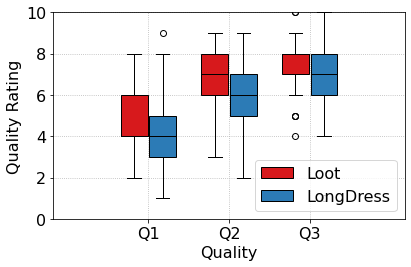

Q1_Loot: median=4.0, max=8, min=2
Q1_LongDress: median=4.0, max=9, min=1
Q2_Loot: median=7.0, max=9, min=3
Q2_LongDress: median=6.0, max=9, min=2
Q3_Loot: median=8.0, max=10, min=4
Q3_LongDress: median=7.0, max=10, min=1
[[5, 6, 4, 5, 5, 3, 6, 2, 4, 3, 2, 6, 4, 4, 6, 6, 4, 5, 6, 3, 6, 5, 2, 4, 4, 7, 2, 8, 4, 8, 4], [7, 7, 7, 8, 7, 9, 7, 6, 6, 4, 8, 8, 8, 7, 8, 7, 7, 9, 3, 6, 7, 6, 7, 5, 9, 7, 9, 5, 8, 6], [8, 8, 8, 10, 8, 7, 8, 7, 7, 8, 5, 9, 8, 9, 8, 7, 7, 8, 8, 4, 7, 9, 7, 8, 5, 10, 6, 9, 8, 9, 5]]
[[3, 5, 4, 3, 4, 3, 5, 5, 2, 1, 2, 5, 3, 4, 5, 5, 4, 4, 7, 2, 5, 5, 2, 4, 4, 6, 3, 8, 5, 9, 3], [5, 6, 6, 9, 5, 8, 8, 6, 4, 5, 4, 7, 6, 6, 7, 8, 5, 7, 6, 2, 5, 6, 7, 4, 6, 8, 4, 9, 6, 5, 5], [8, 7, 9, 7, 8, 7, 6, 7, 4, 4, 10, 8, 8, 7, 8, 6, 8, 8, 1, 5, 8, 9, 6, 6, 9, 6, 9, 7, 9, 7]]


In [8]:
plt.rcParams.update({'font.size': 16})
q1=r11
q2=r33
q3=r55
title = "task1_constant"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500],
          objects_rates[video1][q3][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500],
          objects_rates[video2][q3][d500]]
x=[Q1, Q2, Q3]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality", "Quality Rating")
print(data_a)
print(data_b)

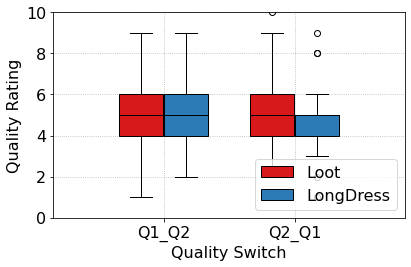

Q1_Q2_Loot: median=5.0, max=9, min=1
Q1_Q2_LongDress: median=5.0, max=9, min=2
Q2_Q1_Loot: median=5.0, max=10, min=2
Q2_Q1_LongDress: median=5.0, max=9, min=1
[[4, 6, 4, 7, 4, 6, 5, 3, 4, 4, 3, 6, 6, 8, 8, 7, 5, 5, 5, 1, 6, 6, 3, 5, 4, 6, 5, 8, 5, 9, 5], [4, 6, 4, 6, 4, 4, 8, 4, 4, 5, 3, 4, 7, 4, 6, 6, 6, 4, 8, 3, 5, 2, 4, 6, 5, 7, 2, 9, 7, 10, 4]]
[[2, 7, 4, 5, 4, 7, 6, 4, 4, 2, 3, 4, 5, 3, 6, 6, 4, 5, 5, 3, 5, 7, 4, 5, 3, 8, 3, 8, 5, 9, 4], [5, 6, 4, 5, 5, 5, 6, 4, 2, 3, 4, 4, 5, 4, 5, 6, 4, 5, 5, 4, 5, 3, 1, 5, 5, 8, 3, 8, 6, 9, 3]]


In [9]:
q1=r13
q2=r31
title = "task1_switch_13"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[Q12, Q21]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switch", "Quality Rating")
print(data_a)
print(data_b)

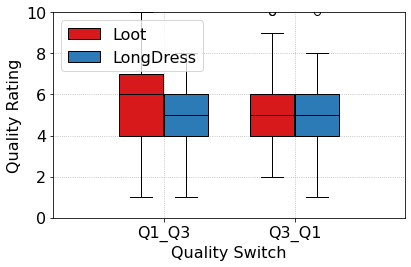

Q1_Q3_Loot: median=6.0, max=10, min=1
Q1_Q3_LongDress: median=5.0, max=8, min=1
Q3_Q1_Loot: median=5.0, max=10, min=2
Q3_Q1_LongDress: median=5.0, max=10, min=1
[[6, 7, 4, 6, 3, 7, 6, 5, 4, 3, 4, 7, 7, 4, 7, 7, 6, 6, 9, 1, 5, 6, 5, 7, 4, 7, 3, 9, 7, 10, 4], [5, 8, 5, 4, 4, 4, 8, 4, 4, 4, 3, 5, 4, 5, 6, 6, 5, 4, 5, 3, 4, 7, 2, 5, 5, 9, 4, 10, 6, 10, 4]]
[[4, 6, 6, 6, 5, 5, 5, 4, 3, 2, 3, 6, 6, 5, 4, 6, 6, 7, 7, 1, 5, 8, 8, 6, 3, 7, 3, 8, 4, 8, 5], [4, 6, 5, 4, 3, 7, 6, 5, 5, 1, 3, 4, 7, 5, 5, 6, 5, 4, 6, 3, 4, 6, 3, 5, 4, 8, 4, 8, 5, 10, 6]]


In [10]:
q1=r15
q2=r51
title = "task1_switch_15"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[Q13, Q31]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switch", "Quality Rating")
print(data_a)
print(data_b)

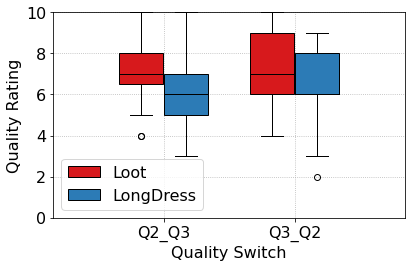

Q2_Q3_Loot: median=7.0, max=10, min=4
Q2_Q3_LongDress: median=6.0, max=10, min=3
Q3_Q2_Loot: median=7.0, max=10, min=4
Q3_Q2_LongDress: median=6.0, max=9, min=2
[[8, 7, 7, 10, 5, 7, 9, 7, 7, 6, 4, 8, 7, 9, 8, 7, 7, 7, 7, 4, 7, 8, 8, 5, 6, 8, 6, 9, 7, 10, 5], [5, 8, 7, 10, 7, 6, 9, 7, 5, 9, 5, 9, 7, 9, 7, 9, 8, 6, 9, 4, 7, 6, 8, 8, 5, 9, 7, 10, 7, 10, 6]]
[[5, 7, 6, 10, 7, 6, 6, 7, 5, 3, 5, 8, 6, 6, 4, 6, 6, 7, 7, 4, 4, 6, 8, 5, 6, 8, 5, 9, 8, 10, 5], [6, 7, 6, 7, 8, 8, 7, 3, 6, 2, 6, 8, 8, 8, 5, 6, 6, 8, 6, 3, 6, 6, 7, 6, 5, 8, 5, 9, 7, 9, 6]]


In [11]:
q1=r35
q2=r53
title = "task1_switch_35"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[Q23, Q32]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switch", "Quality Rating")
print(data_a)
print(data_b)

## QoMEX - Task 2

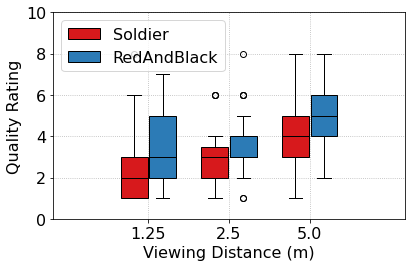

1.25_Soldier: median=2.0, max=8, min=1
1.25_RedAndBlack: median=3.0, max=7, min=1
2.5_Soldier: median=3.0, max=6, min=1
2.5_RedAndBlack: median=3.0, max=8, min=1
5.0_Soldier: median=4.0, max=8, min=1
5.0_RedAndBlack: median=5.0, max=8, min=2
[[1, 1, 6, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 4, 3, 1, 1, 3, 2, 8, 2, 5, 1, 3, 3], [2, 6, 4, 1, 3, 1, 3, 1, 2, 2, 2, 3, 1, 1, 2, 4, 2, 2, 4, 4, 2, 2, 3, 3, 3, 6, 2, 6, 4, 3, 3], [3, 3, 6, 3, 1, 4, 3, 4, 5, 4, 2, 3, 4, 5, 4, 7, 6, 3, 3, 4, 3, 2, 2, 3, 4, 5, 8, 2, 6, 5, 3, 4]]
[[2, 1, 6, 2, 1, 2, 3, 2, 1, 2, 5, 3, 2, 5, 1, 3, 5, 5, 4, 3, 4, 4, 1, 1, 4, 2, 7, 3, 6, 2, 5, 5], [4, 6, 3, 1, 3, 4, 3, 2, 2, 2, 3, 4, 4, 3, 3, 5, 3, 5, 6, 5, 3, 1, 3, 4, 3, 8, 2, 6, 4, 4, 4], [4, 2, 6, 4, 3, 3, 5, 5, 3, 6, 5, 4, 6, 6, 3, 6, 6, 4, 6, 5, 5, 4, 4, 5, 5, 4, 6, 3, 7, 6, 8, 4]]


In [12]:
q=r1
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)

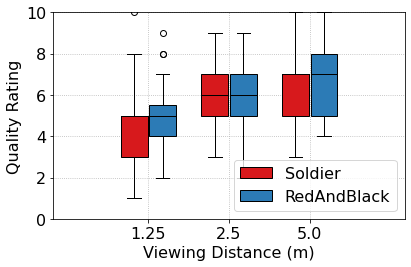

1.25_Soldier: median=5.0, max=10, min=1
1.25_RedAndBlack: median=5.0, max=9, min=2
2.5_Soldier: median=6.0, max=9, min=3
2.5_RedAndBlack: median=6.0, max=9, min=2
5.0_Soldier: median=7.0, max=10, min=3
5.0_RedAndBlack: median=7.0, max=10, min=4
[[3, 5, 7, 3, 1, 4, 5, 3, 2, 5, 3, 5, 4, 5, 3, 3, 6, 5, 5, 6, 5, 5, 2, 5, 5, 4, 10, 5, 8, 2, 6, 5], [6, 8, 5, 4, 5, 7, 6, 3, 5, 4, 4, 7, 9, 5, 6, 6, 6, 6, 9, 3, 6, 4, 6, 5, 5, 9, 6, 8, 6, 8, 7], [5, 7, 5, 7, 6, 8, 5, 3, 7, 7, 6, 8, 10, 8, 7, 7, 5, 8, 9, 6, 5, 5, 7, 7, 5, 10, 4, 7, 5, 3, 4]]
[[4, 6, 3, 2, 5, 5, 5, 2, 4, 5, 3, 5, 5, 4, 5, 7, 5, 7, 8, 5, 5, 3, 6, 6, 4, 9, 4, 8, 3, 5, 5], [6, 5, 7, 5, 6, 4, 6, 6, 2, 7, 7, 4, 5, 7, 5, 5, 7, 6, 6, 7, 7, 6, 4, 6, 5, 4, 9, 4, 8, 6, 7, 8], [5, 7, 5, 10, 5, 7, 7, 4, 5, 7, 5, 8, 9, 5, 8, 7, 8, 8, 8, 6, 6, 6, 6, 5, 6, 10, 4, 8, 5, 7, 7]]


In [13]:
q=r3
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)

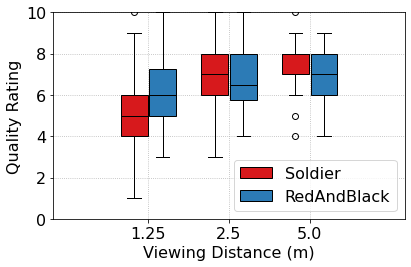

1.25_Soldier: median=5.0, max=10, min=1
1.25_RedAndBlack: median=6.0, max=10, min=3
2.5_Soldier: median=7.0, max=10, min=3
2.5_RedAndBlack: median=6.5, max=10, min=4
5.0_Soldier: median=8.0, max=10, min=4
5.0_RedAndBlack: median=7.0, max=9, min=4
[[1, 5, 8, 3, 4, 6, 5, 5, 3, 3, 5, 4, 5, 9, 3, 6, 7, 5, 6, 9, 5, 8, 4, 6, 6, 3, 10, 6, 8, 6, 6, 5], [7, 8, 5, 8, 6, 7, 7, 4, 4, 9, 5, 7, 9, 6, 5, 8, 5, 8, 7, 7, 6, 6, 8, 6, 3, 10, 7, 10, 7, 7, 8], [7, 8, 8, 6, 8, 7, 9, 8, 7, 6, 9, 7, 9, 9, 8, 8, 8, 9, 8, 9, 4, 8, 6, 7, 7, 5, 10, 8, 8, 7, 8, 6]]
[[5, 6, 8, 5, 7, 6, 4, 5, 3, 3, 5, 5, 7, 9, 5, 4, 8, 5, 7, 8, 5, 7, 5, 6, 6, 4, 10, 5, 10, 7, 8, 8], [8, 6, 7, 6, 9, 4, 6, 5, 4, 4, 4, 6, 9, 8, 8, 8, 7, 5, 8, 10, 7, 6, 6, 7, 5, 4, 9, 6, 7, 6, 7, 7], [8, 7, 7, 9, 7, 8, 6, 6, 5, 6, 5, 8, 9, 7, 9, 8, 9, 7, 8, 4, 8, 8, 6, 5, 7, 9, 7, 7, 7, 7, 6]]


In [14]:
q=r5
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)

# Radar plot

colors = ['#D7191C', '#2C7BB6']

In [15]:
def plot_radar(categories, traces, names, outputPath, title):
    fig = go.Figure()

    for i in range(len(traces)):
        fig.add_trace(go.Scatterpolar(
            r=traces[i],
            theta=categories,
            fill='toself',
            name=names[i]
        ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[1, 10]
        )),
    showlegend=True
    )

    fig.show()
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))

In [92]:
plt.style.use('ggplot')
import matplotlib as mpl
COLOR = "black"
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


def plot_radar_v2(categories, traces, names, outputPath, title, x_labels):
    angles=np.linspace(0,2*np.pi,len(categories), endpoint=False)
    # angles = [i*2*np.pi/len(categories) for i in range(len(categories))]
    print("angles: ", (angles))

    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(polar=True)

    categories += categories[:1]
    angles = np.append(angles,angles[:1])

    x_labels += x_labels[:1]



    print("categories: ", (categories))
    for i in range(len(traces)):

        traces[i] += traces[i][:1]

        ax.plot(angles,traces[i], 'o-', color=colors[i], linewidth=2, label=names[i])
        ax.fill(angles, traces[i], alpha=0.25, color=colors[i])

    ax.set_thetagrids(angles * 180/np.pi, x_labels)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)


    plt.grid(True)

    fig.show()
    plt.legend(bbox_to_anchor=(1.22,1.22))
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))

angles:  [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361]
categories:  ['r1_r1', 'r3_r3', 'r5_r5', 'r1_r3', 'r3_r1', 'r3_r5', 'r5_r3', 'r1_r5', 'r5_r1', 'r1_r1']


/var/folders/3b/q3j0_8jx1r16_v2mnl8r9w2w0000gn/T/ipykernel_89517/2238417819.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


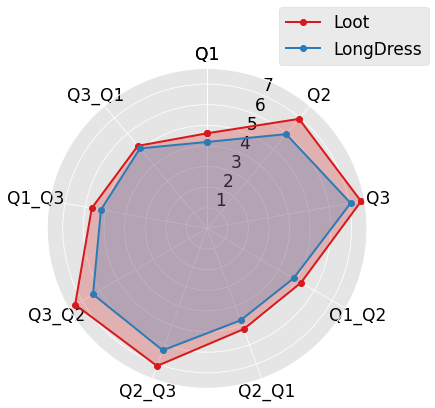

In [93]:
plt.rcParams.update({'font.size': 17})
video1=loot
video2=longDress
categories = [r11, r33, r55, r13, r31, r35, r53, r15, r51]
x_labels = [Q1, Q2, Q3, Q12, Q21, Q23, Q32, Q13, Q31]
trace_1 = [np.average(objects_rates[video1][i][d500]) for i in categories]
trace_2 = [np.average(objects_rates[video2][i][d500]) for i in categories]
traces = [
    trace_1, trace_2
]
title="quality_radar"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
plot_radar_v2(categories, traces, [video1, video2], outputPath, title, x_labels)
